In [1]:
# Observations and Insights : 


In [2]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
raw_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
raw_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
summary_base_df = raw_df.copy()
summary_slim_df = summary_base_df.drop(['Mouse ID', 'Sex', 'Age_months',
                                       'Weight (g)', 'Metastatic Sites',
                                       'Timepoint'], axis=1).copy()
tumor_summary_base_df = summary_slim_df.copy()
tumor_summary_base_df['Mean TV'] = summary_slim_df['Tumor Volume (mm3)']
tumor_summary_base_df['Median TV'] = summary_slim_df['Tumor Volume (mm3)']
tumor_summary_base_df['Variance TV'] = summary_slim_df['Tumor Volume (mm3)']
tumor_summary_base_df['STD TV'] = summary_slim_df['Tumor Volume (mm3)']
tumor_summary_base_df['SEM TV'] = summary_slim_df['Tumor Volume (mm3)']

summary_df = tumor_summary_base_df.groupby(['Drug Regimen']).agg({'Mean TV' : 'mean',
                                                                 'Median TV' : 'median',
                                                                 'Variance TV' : np.var,
                                                                 'STD TV' : np.std,
                                                                 'SEM TV' : 'sem'})
summary_df

,Mean TV,Median TV,Variance TV,STD TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
raw_df['Timepoint'].value_counts()

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

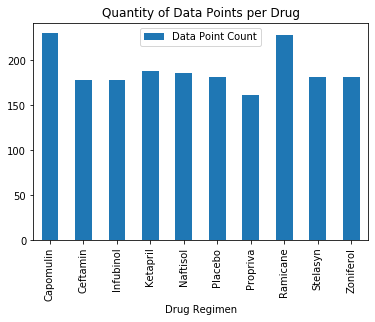

In [5]:
# Pandas Bar Chart - bar plot showing number of data points for each treatment regimen
plt.close()
reg_vs_dPQ = raw_df[['Drug Regimen', 'Tumor Volume (mm3)']].copy()
RvQ_df = reg_vs_dPQ.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : 'count'}).copy()
RvQ_df = RvQ_df.rename(columns={"Tumor Volume (mm3)": "Data Point Count"})

RvQ_df.plot(kind='bar', title='Quantity of Data Points per Drug')
plt.show()

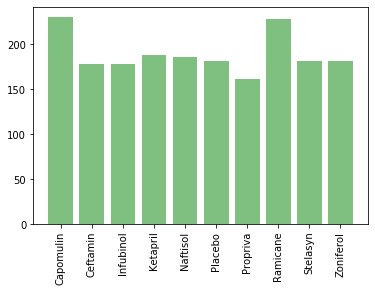

In [6]:
# plt bar chart - bar plot showing number of data points for each treatment regimen
plt.close()
x_axis = np.arange(len(raw_df['Drug Regimen'].unique()))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, RvQ_df['Data Point Count'], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, RvQ_df.index.values, rotation="vertical")

plt.show()

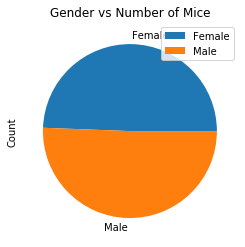

In [22]:
# pandas pie chart
plt.close()
MvsF_df = raw_df[['Mouse ID', 'Sex']].copy()
MvsF_df = MvsF_df.groupby(['Sex']).agg({'Mouse ID' : 'count'})
MvsF_df = MvsF_df.rename(columns={"Mouse ID": "Count"})
MvsF_df
MvsF_df.plot(kind='pie', y='Count' , title='Gender vs Number of Mice')

plt.show()

In [14]:
raw_df['Sex'].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

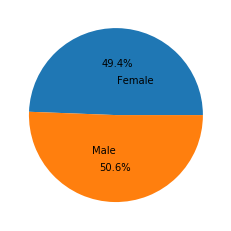

In [33]:
# plt pie chart
plt.close()
plt.pie(MvsF_df['Count'], labels=MvsF_df.index.values,  autopct='%1.1f%%', labeldistance=.4)

plt.show()

In [91]:
base_promising_df = raw_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']].copy()
mice_max_time = base_promising_df.groupby('Mouse ID', as_index=False).agg({'Timepoint' : 'max',
                                                                          'Tumor Volume (mm3)' : 'last',
                                                                          'Drug Regimen' : 'first'})
mice_max_time = mice_max_time.rename(columns={'Timepoint' : 'Max Timepoint'})
mice_min_time = base_promising_df.groupby('Mouse ID', as_index=False).agg({'Timepoint' : 'min',
                                                                          'Tumor Volume (mm3)' : 'first',
                                                                          'Drug Regimen' : 'first'})
mice_min_time = mice_min_time.rename(columns={'Timepoint' : 'Min Timepoint'})
grup_promis_df = mice_min_time.copy()
grup_promis_df['Tumor Volume (mm3)'] = grup_promis_df['Tumor Volume (mm3)'] - mice_max_time['Tumor Volume (mm3)']
grup_promis_df['Avg Change in TV'] = grup_promis_df['Tumor Volume (mm3)']
promis_df = grup_promis_df.groupby('Drug Regimen').agg({'Avg Change in TV' : 'mean'})
promis_df = promis_df.sort_values('Avg Change in TV', ascending=False).head(4)
promisingDrugs = promis_df.index.values
promis_df

,Avg Change in TV
Drug Regimen,
Ramicane,8.808610
Capomulin,8.332432
Propriva,-11.736964
Ceftamin,-12.753977


In [96]:
# Quartiles, outliers and boxplots

,Mouse ID,Max Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
244,z435,10,48.710661,Propriva
245,z578,45,30.638696,Ramicane
246,z581,45,62.754451,Infubinol
247,z795,45,65.741070,Naftisol


In [90]:
raw_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
plt.close()


plt.show()

In [ ]:
plt.close()


plt.show()

In [35]:
# Line and scatter plots
plt.close()


plt.show()

In [57]:
plt.close()


plt.show()

In [58]:
plt.close()


plt.show()